<a href="https://colab.research.google.com/github/aditya-chawla/Machine-Learning/blob/main/Logistic_Regression_Ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aim: Implementation of Logistic Regression algorithm

In [ ]:
# import numpy, matplotlib, pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# import dataset "Saving Social_Network_Ads"
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads (3).csv


In [ ]:
# read the dataset and make a dataframe and make x and y
dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1].values

In [ ]:
# from sklearn import train test split and split dataset into train and test samples
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
# from sklearn import StandardScaler and scale x_train and x_test
from sklearn.preprocessing import StandardScaler

In [ ]:
# transpose all x_train, x_test, y_train and y_test
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
x_train=x_train.T
x_test=x_test.T
y_train=y_train.T
y_test=y_test.T
y_train
x_train.shape

(2, 300)

[[0.01]
 [0.01]]


Text(0.5, 1.0, 'cost after iterations')

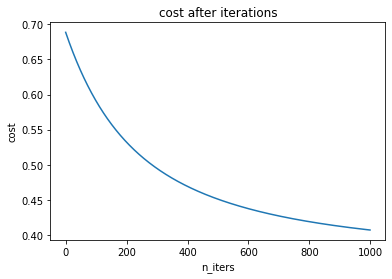

In [ ]:
# intialize the weights and bias, length of training samples, number of iteration
# implement gradient descent algorithm to update the weights
# plot cost function with number of iteration
alpha= 0.01
num_itr=1000
m=x_train.shape[1]
cost=[]
w=np.full((x_train.shape[0],1),0.01)
print(w)
b=0.0
for _ in range(num_itr):
  z=np.dot(w.T,x_train)+b
  a=1/(1+np.exp(-z))
  loss=-y_train*np.log(a)-(1-y_train)*np.log(1-a)
  cost.append((np.sum(loss))/m)
  gradient_weight=(np.dot(x_train,((a-y_train).T)))/m
  gradient_bias=np.sum(a-y_train)/m
  b=b-alpha*gradient_bias
  w=w-alpha*gradient_weight
plt.plot(range(num_itr),cost)
plt.xlabel("n_iters")
plt.ylabel("cost")
plt.title("cost after iterations")


In [ ]:
# show final undated weights as a dataframe
g_w = pd.DataFrame(gradient_weight)
g_w

,0
0,-0.057305
1,-0.029157


In [ ]:
# predict output corresponding to x_test using final updated weights and bias
z=np.dot(w.T,x_test)+b
m1=x_test.shape[1]
y_pred=np.zeros(m1,dtype='int')
for i in range(m1):
  if z[0,1]<=0.5:
    y_pred[i]=0
  else:
    y_pred[i]=1
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# from sklearn.metrics import confusion_matrix and accuracy_score and calculate confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print (cm)
accuracy_score(y_test, y_pred)

[[68  0]
 [32  0]]


0.68